## Week Worksheet

Curse of Dimensionality Demonstration

This script illustrates two counter-intuitive properties of high-dimensional spaces
that are fundamental to understanding the "Curse of Dimensionality".

1.  Data Sparsity: Most points in a high-dimensional hypercube are located in the "corners",
    far from the center. We show this by comparing the volume of a hypersphere to the
    volume of its enclosing hypercube.

2.  Volume Concentration: Most of the volume of a high-dimensional hypercube is
    concentrated in a thin "shell" or "crust" near its surface.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_style():
    """Applies a professional and readable style to the plots."""
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'lines.linewidth': 2.5,
        'lines.markersize': 8
    })

def sparsity_demonstration(max_dimensions=20, num_points=10000):
    """
    Demonstrates data sparsity by calculating the ratio of points inside a hypersphere
    to the total points in an enclosing hypercube.

    Args:
        max_dimensions (int): The maximum number of dimensions to test.
        num_points (int): The number of random points to generate for each dimension.

    Returns:
        tuple: A tuple containing the list of dimensions and the list of ratios.
    """
    dimensions = range(1, max_dimensions + 1)
    ratios = []

    print("--- Sparsity Demonstration ---")
    print("Calculating fraction of points inside a hypersphere...")

    for d in dimensions:
        # Generate random points in a d-dimensional hypercube of side length 2
        # (coordinates from -1 to 1).
        points = np.random.uniform(-1, 1, size=(num_points, d))

        # Calculate the distance of each point from the origin (L2 norm).
        distances = np.linalg.norm(points, axis=1)

        # Count how many points are inside the inscribed hypersphere of radius 1.
        points_inside = np.sum(distances <= 1)

        # Calculate the ratio. This approximates the volume ratio of the
        # hypersphere to the hypercube.
        ratio = points_inside / num_points
        ratios.append(ratio)
        print(f"Dimension: {d:2d}, Ratio: {ratio:.4f}")

    return dimensions, ratios

def volume_concentration_demonstration(max_dimensions=100, shell_thickness=0.01):
    """
    Demonstrates that the volume of a hypercube concentrates near its surface.

    Args:
        max_dimensions (int): The maximum number of dimensions to test.
        shell_thickness (float): The thickness of the outer shell (as a percentage).

    Returns:
        tuple: A tuple containing dimensions and the percentage of volume in the shell.
    """
    dimensions = range(1, max_dimensions + 1)
    shell_volume_ratios = []

    print("\n--- Volume Concentration Demonstration ---")
    print(f"Calculating volume in a shell of thickness {shell_thickness*100}%...")

    for d in dimensions:
        # The volume of a hypercube with side length L is L^d.
        # Let's consider a unit hypercube (L=1), so total volume is 1^d = 1.
        
        # The "inner" hypercube, excluding the shell, has a side length of
        # 1.0 - 2 * shell_thickness (we subtract from both sides).
        inner_side_length = 1.0 - (2 * shell_thickness)
        
        # The volume of this inner hypercube is (inner_side_length)^d.
        inner_volume = inner_side_length ** d
        
        # The volume of the shell is the total volume minus the inner volume.
        shell_volume_ratio = 1.0 - inner_volume
        shell_volume_ratios.append(shell_volume_ratio)
        
        if d % 10 == 0 or d == 1:
            print(f"Dimension: {d:3d}, Volume in shell: {shell_volume_ratio:.4%}")

    return dimensions, shell_volume_ratios

--- Sparsity Demonstration ---
Calculating fraction of points inside a hypersphere...
Dimension:  1, Ratio: 1.0000
Dimension:  2, Ratio: 0.7776
Dimension:  3, Ratio: 0.5221
Dimension:  4, Ratio: 0.3077
Dimension:  5, Ratio: 0.1650
Dimension:  6, Ratio: 0.0776
Dimension:  7, Ratio: 0.0383
Dimension:  8, Ratio: 0.0157
Dimension:  9, Ratio: 0.0068
Dimension: 10, Ratio: 0.0026
Dimension: 11, Ratio: 0.0006
Dimension: 12, Ratio: 0.0007
Dimension: 13, Ratio: 0.0000
Dimension: 14, Ratio: 0.0000
Dimension: 15, Ratio: 0.0000
Dimension: 16, Ratio: 0.0000
Dimension: 17, Ratio: 0.0000
Dimension: 18, Ratio: 0.0000
Dimension: 19, Ratio: 0.0000
Dimension: 20, Ratio: 0.0000

--- Volume Concentration Demonstration ---
Calculating volume in a shell of thickness 1.0%...
Dimension:   1, Volume in shell: 2.0000%
Dimension:  10, Volume in shell: 18.2927%
Dimension:  20, Volume in shell: 33.2392%
Dimension:  30, Volume in shell: 45.4516%
Dimension:  40, Volume in shell: 55.4300%
Dimension:  50, Volume in shel

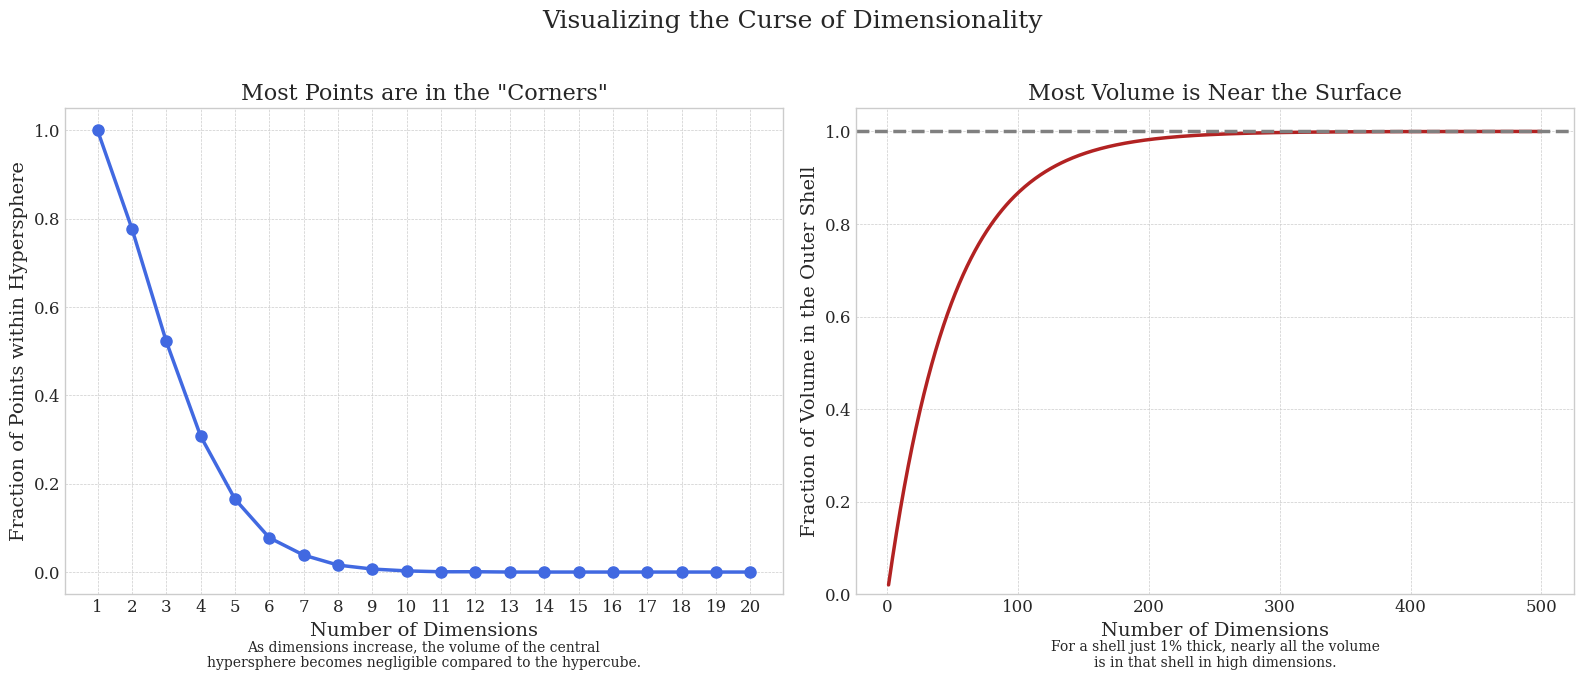

In [2]:
"""Main function to run demonstrations and create plots."""
plot_style()

# --- Run Demonstrations ---
dims_sparsity, ratios = sparsity_demonstration(max_dimensions=20)
dims_volume, shell_ratios = volume_concentration_demonstration(max_dimensions=500, shell_thickness=0.01)

# --- Create Plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Visualizing the Curse of Dimensionality', fontsize=18)

# Plot 1: Sparsity
ax1.plot(dims_sparsity, ratios, marker='o', linestyle='-', color='royalblue')
ax1.set_title('Most Points are in the "Corners"')
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Fraction of Points within Hypersphere')
ax1.set_xticks(dims_sparsity)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.text(0.5, -0.15, 'As dimensions increase, the volume of the central\nhypersphere becomes negligible compared to the hypercube.', 
         transform=ax1.transAxes, ha='center', fontsize=10)

# Plot 2: Volume Concentration
ax2.plot(dims_volume, shell_ratios, marker='', linestyle='-', color='firebrick')
ax2.set_title('Most Volume is Near the Surface')
ax2.set_xlabel('Number of Dimensions')
ax2.set_ylabel('Fraction of Volume in the Outer Shell')
ax2.axhline(y=1.0, color='gray', linestyle='--', label='100% Volume')
ax2.set_ylim(0, 1.05)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.text(0.5, -0.15, 'For a shell just 1% thick, nearly all the volume\nis in that shell in high dimensions.', 
         transform=ax2.transAxes, ha='center', fontsize=10)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Naive Bayes

In [3]:
# -*- coding: utf-8 -*-
"""
Exercise: Naive Bayes Classifier from Scratch

Goal: Implement the Gaussian Naive Bayes algorithm without using any
pre-built classifier libraries (like scikit-learn's GaussianNB).

You will be tested on the Wine dataset, which has continuous numerical features.
"""

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

class NaiveBayes:
    """
    Gaussian Naive Bayes classifier.
    """

    def fit(self, X, y):
        """
        Fit the model by calculating the mean, variance, and prior for each class.

        Args:
            X (np.ndarray): Training data of shape (n_samples, n_features).
            y (np.ndarray): Target values of shape (n_samples,).
        """
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # --- YOUR CODE HERE ---
        # Initialize arrays to store the mean, variance, and priors.
        # These should be class attributes (e.g., self._mean, self._var, self._priors).
        # self._mean should have shape (n_classes, n_features)
        # self._var should have shape (n_classes, n_features)
        # self._priors should have shape (n_classes,)
        
        # TODO: Calculate the mean, variance, and prior for each class.
        # HINT: Iterate over each class 'c' in self._classes.
        # 1. Create a subset of the data X_c where the label is 'c'.
        # 2. Calculate the mean of each feature for X_c.
        # 3. Calculate the variance of each feature for X_c.
        # 4. Calculate the prior probability of class 'c'. The prior is the
        #    ratio of the number of samples in class 'c' to the total number of samples.
        
        pass # Remove this line once you start implementing

    def predict(self, X):
        """
        Predict the class labels for a given set of samples.

        Args:
            X (np.ndarray): Samples to predict, shape (n_samples, n_features).

        Returns:
            np.ndarray: The predicted class labels.
        """
        # --- YOUR CODE HERE ---
        # TODO: Return an array of predictions for each sample in X.
        # HINT: You can use a helper function that predicts a single sample
        # and apply it to all samples in X using a list comprehension.
        # Example: return np.array([self._predict_sample(x) for x in X])
        
        pass # Remove this line once you start implementing

    def _predict_sample(self, x):
        """
        Predict the class label for a single sample.

        Args:
            x (np.ndarray): A single sample of shape (n_features,).

        Returns:
            int: The predicted class label.
        """
        posteriors = []

        # --- YOUR CODE HERE ---
        # TODO: Calculate the posterior probability for each class.
        # HINT: Iterate over each class 'c' in self._classes.
        # 1. Start with the prior probability for the class: np.log(self._priors[idx])
        #    (Using log probabilities is a good practice to avoid underflow).
        # 2. For each feature in the sample 'x', add the log of the class conditional probability.
        #    This probability is calculated using the Gaussian Probability Density Function (PDF).
        # 3. Append the final posterior probability to the `posteriors` list.
        
        # The Gaussian PDF formula is:
        #                  1                / (x_i - mean)^2 \
        # P(x_i|y) = ---------------- * exp| - -------------- |
        #            sqrt(2*pi*var)         \   2 * var      /
        
        # After calculating the posteriors for all classes, return the class with the
        # highest posterior probability.
        # HINT: use np.argmax(posteriors) to get the index of the best class.
        
        pass # Remove this line once you start implementing

    def _gaussian_pdf(self, class_idx, x):
        """
        Helper function to calculate the probability density of a sample for a given class.
        (You can implement the PDF logic directly in _predict_sample or use this helper).
        """
        pass # This is an optional helper function


# --- Main script execution ---
if __name__ == "__main__":
    
    def accuracy(y_true, y_pred):
        """Calculates the accuracy of a prediction."""
        return np.sum(y_true == y_pred) / len(y_true)

    # Load and prepare the dataset
    data = load_wine()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    # Instantiate and train the classifier
    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    
    # Make predictions
    predictions = nb.predict(X_test)

    # Print the results
    print("Naive Bayes classification accuracy from scratch:", accuracy(y_test, predictions))


/Users/shivin/miniconda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Naive Bayes classification accuracy from scratch: 0.0
